In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

**Loading data**

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3613,3614,15770159,Nnanna,664,Germany,Male,25,6,172812.72,2,1,1,108008.65,0
1396,1397,15748797,Dale,636,Spain,Female,33,0,0.00,1,1,0,92277.47,1
8751,8752,15635531,Boag,575,Spain,Female,30,8,0.00,2,1,0,185341.63,0
732,733,15723873,Ponomarev,657,Spain,Male,31,3,125167.02,1,0,0,98820.39,0
1042,1043,15593969,Abramovich,630,Spain,Female,39,7,135483.17,1,1,0,140881.20,1


**dropping columns that are of no use**

In [ ]:
df.drop(['Surname','CustomerId','RowNumber'],axis='columns',inplace=True)

In [ ]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [ ]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


**Data Visualization**

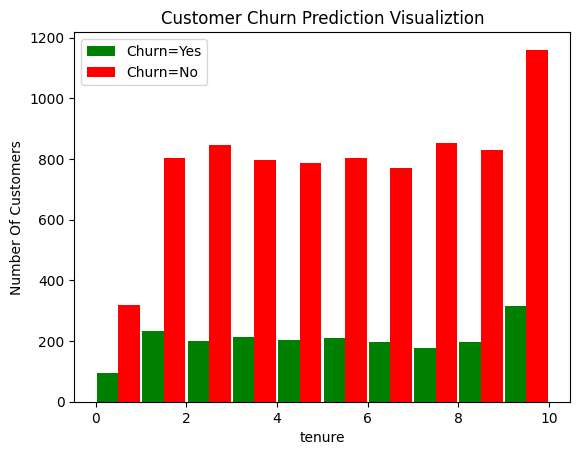

In [ ]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

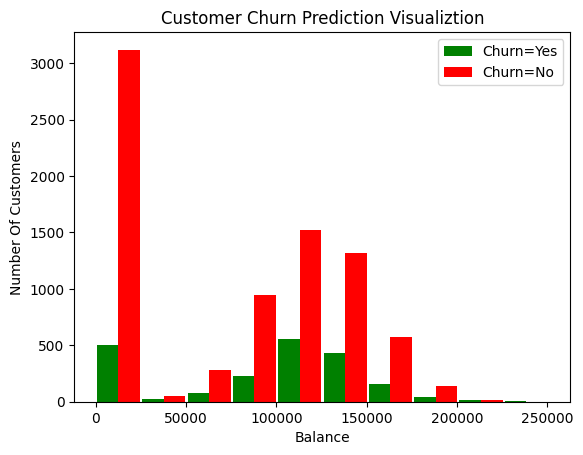

In [ ]:
b_churn_no = df[df.Exited==0].Balance
b_churn_yes = df[df.Exited==1].Balance

plt.xlabel("Balance")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([b_churn_yes, b_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [ ]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [ ]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


**One hot encoding for categorical columns**

In [ ]:
df1 = pd.get_dummies(data=df, columns=[	"Geography","Gender"])
df1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [ ]:
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,False,True


In [ ]:
df1.dtypes

,0
CreditScore,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Exited,int64
Geography_France,bool


In [ ]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance',	'NumOfProducts',	'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [ ]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

**Train test split**

In [ ]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
len(X_train.columns)

13

In [ ]:
np.bincount(y_test)

array([1595,  405])

**Building a model (ANN) in tensorflow/keras**

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6200 - loss: 0.6343
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7930 - loss: 0.4938
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8021 - loss: 0.4642
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8045 - loss: 0.4492
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8170 - loss: 0.4294
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8229 - loss: 0.4125
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8189 - loss: 0.4131
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8421 - loss: 0.3758
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8513 - loss: 0.3655
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8440 - loss: 0.3717


In [ ]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8437 - loss: 0.3748


[0.37570592761039734, 0.8410000205039978]

In [ ]:
yp = model.predict(X_test)
yp[:10]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


array([[0.08396671],
       [0.07553805],
       [0.05232867],
       [0.06890335],
       [0.12187231],
       [0.26009285],
       [0.02844137],
       [0.22167404],
       [0.0378773 ],
       [0.7628473 ]], dtype=float32)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

**classification report**

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.91      1595
           1       0.72      0.35      0.47       405

    accuracy                           0.84      2000
   macro avg       0.79      0.66      0.69      2000
weighted avg       0.83      0.84      0.82      2000



Text(95.72222222222221, 0.5, 'Truth')

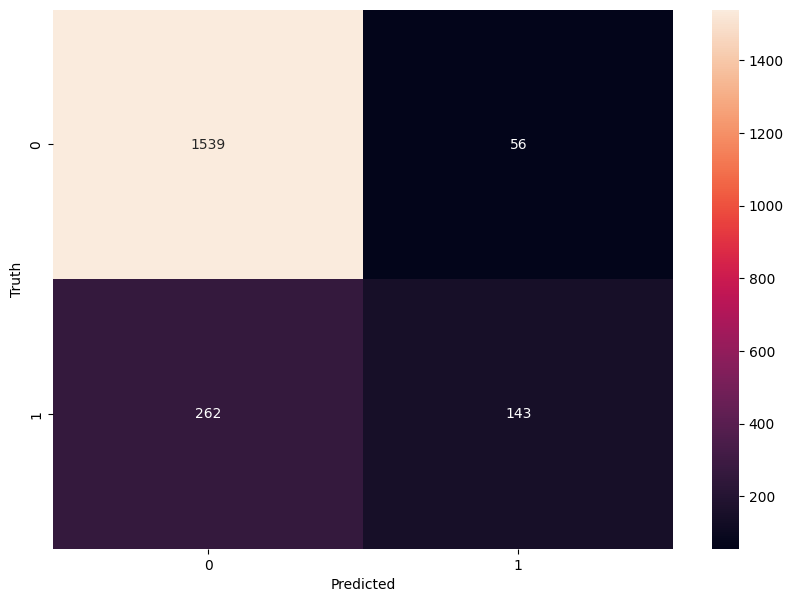

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Data is imbalanced thats why it is not predicting class 1 correctly.

# Manually calculating

**Accuracy**

In [1]:
round((1539+143)/(1539+143+262+56),2)

0.84

**Precision for 0 class. i.e. Precision for customers who did not churn**

In [4]:
round(1539/(1539+262),2)

0.85

**Precision for 1 class. i.e. Precision for customers who did churn**

In [3]:
round(143/(143+56),2)

0.72

**Recall for 0 class**

In [5]:
round(1539/(1539+56),2)

0.96

**Recall for 1 class**

In [6]:
round(143/(143+262),2)

0.35

**F1 Score**

In [13]:
round((2*0.96*0.85)/(0.96+0.85),2)

0.9